# The "Current Controversy" of the 2013 World Championships
> Some swimmers said that they felt it was easier to swim in one direction versus another in the 2013 World Championships. Some analysts have posited that there was a swirling current in the pool. In this chapter, you'll investigate this claim! References - Quartz Media, Washington Post, SwimSwam, and Cornett, et al. This is the Summary of lecture "Case Studies in Statistical Thinking", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics]
- image: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to the current controversy
- Task
    - Investigate improvement of individual swimmers moving from low- to high-numbered lanes in 50m events
    - Compute the size of the effect
    - Test the hypothesis that on average there is no difference between low- and high-numbered lanes

### ECDF of improvement from low to high lanes
Now that you have a metric for improvement going from low- to high-numbered lanes, plot an ECDF of this metric. I have put together the swim times of all swimmers who swam a 50 m semifinal in a high numbered lane and the final in a low numbered lane, and vice versa. The swim times are stored in the Numpy arrays `swimtime_high_lanes` and `swimtime_low_lanes`. Entry i in the respective arrays are for the same swimmer in the same event.

In [44]:
swimtime_high_lanes = np.array([24.62, 22.9 , 27.05, 24.76, 30.31, 24.54, 26.12, 27.71, 23.15,
       23.11, 21.62, 28.02, 24.73, 24.95, 25.83, 30.61, 27.04, 21.67,
       27.16, 30.23, 21.51, 22.97, 28.05, 21.65, 24.54, 26.06])

swimtime_low_lanes = np.array([24.66, 23.28, 27.2 , 24.95, 32.34, 24.66, 26.17, 27.93, 23.35,
       22.93, 21.93, 28.33, 25.14, 25.19, 26.11, 31.31, 27.44, 21.85,
       27.48, 30.66, 21.74, 23.22, 27.93, 21.42, 24.79, 26.46])

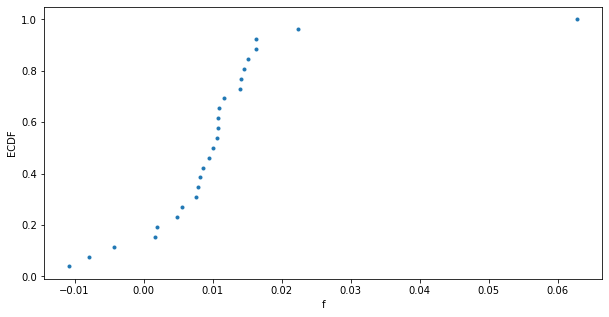

In [46]:
# Compute the fractional improvement of being in high lane: f
f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes

# Make x and y values for ECDF: x, y
x, y = dcst.ecdf(f)

# Plot the ECDFs as dots
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label the axes and show the plot
_ = plt.xlabel('f')
_ = plt.ylabel('ECDF')

Oooo, this is starting to paint a picture of lane bias. The ECDF demonstrates that all but three of the 26 swimmers swam faster in the high numbered lanes.

### Estimation of mean improvement
You will now estimate how big this current effect is. Compute the mean fractional improvement for being in a high-numbered lane versus a low-numbered lane, along with a 95% confidence interval of the mean.



In [47]:
# Compute the mean difference: f_mean
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, size=10000)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Print the result
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))


mean frac. diff.: 0.01051
95% conf int of mean frac. diff.: [0.00624, 0.01596]


it sure looks like swimmers are faster in lanes 6-8.

### How should we test the hypothesis?
Q: You are interested in the presence of lane bias toward higher lanes, presumably due to a slight current in the pool. A natural null hypothesis to test, then, is that the mean fractional improvement going from low to high lane numbers is zero. Which of the following is a good way to simulate this null hypothesis?

A: Subtract the mean of `f` from `f` to generate `f_shift`. Then, take bootstrap replicate of the mean from this `f_shift`.

### Hypothesis test: Does lane assignment affect performance?
Perform a bootstrap hypothesis test of the null hypothesis that the mean fractional improvement going from low-numbered lanes to high-numbered lanes is zero. Take the fractional improvement as your test statistic, and "at least as extreme as" to mean that the test statistic under the null hypothesis is greater than or equal to what was observed.

In [58]:
# Shift f: f_shift
f_shift = f - f_mean

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, 100000)

# Compute and report the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000
print('p =', p_val)

p = 0.00027


A p-value of 0.0003 is quite small and suggests that the mean fractional improvment is greater than zero. For fun, I tested the more restrictive hypothesis that lane number has no bearing at all on performance (item (1) in the previous MCQ), and I got an even smaller p-value of about 0.00001. You can perform that test, too, for practice if you like.

### Did the 2015 event have this problem?
You would like to know if this is a typical problem with pools in competitive swimming. To address this question, perform a similar analysis for the results of the 2015 FINA World Championships. That is, compute the mean fractional improvement for going from lanes 1-3 to lanes 6-8 for the 2015 competition, along with a 95% confidence interval on the mean. Also test the hypothesis that the mean fractional improvement is zero.

In [59]:
swimtime_high_lanes_15 = np.array([27.7 , 24.64, 23.21, 23.09, 26.87, 30.74, 21.88, 24.5 , 21.86,
       25.9 , 26.2 , 24.73, 30.13, 26.92, 24.31, 30.25, 26.76])
swimtime_low_lanes_15 = np.array([27.66, 24.69, 23.29, 23.05, 26.87, 31.03, 22.04, 24.51, 21.86,
       25.64, 25.91, 24.77, 30.14, 27.23, 24.31, 30.2 , 26.86])

In [60]:
# Compute f and its mean
f = (swimtime_low_lanes_15 - swimtime_high_lanes_15) / swimtime_low_lanes_15
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates
bs_reps = dcst.draw_bs_reps(f, np.mean, 10000)

# Compute 95% confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Shift f
f_shift = f - f_mean

# Draw 100,000 bootstrap replicates of the mean
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, 100000)

# Compute the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000

# Print the results
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]
p-value: {3:.5f}""".format(f_mean, *conf_int, p_val))


mean frac. diff.: 0.00079
95% conf int of mean frac. diff.: [-0.00187, 0.00331]
p-value: 0.28332


Both the confidence interval an the p-value suggest that there was no lane bias in 2015.

## The zigzag effect


### Which splits should we consider?
Q: As you proceed to quantitatively analyze the zigzag effect in the 1500 m, which splits should you include in our analysis?

A: 
You should include all splits except the first two and the last two. You should neglect the last two because swimmers stop pacing themselves and "kick" for the final stretch. The first two are different because they involve jumping off the starting blocks and more underwater swimming than others.

### EDA: mean differences between odd and even splits
To investigate the differences between odd and even splits, you first need to define a difference metric. In previous exercises, you investigated the improvement of moving from a low-numbered lane to a high-numbered lane, defining f = (ta - tb) / ta. There, the ta in the denominator served as our reference time for improvement. Here, you are considering both improvement and decline in performance depending on the direction of swimming, so you want the reference to be an average. So, we will define the fractional difference as $f = 2 \frac{(t_a - t_b)}{(t_a + t_b)}$.

Your task here is to plot the mean fractional difference between odd and even splits versus lane number.

In [62]:
f_13 = np.array([-0.01562214, -0.0146381 , -0.00977673, -0.00525713,  0.00204104,
        0.00381014,  0.0075664 ,  0.01525869])
f_15 = np.array([-0.00516018, -0.00392952, -0.00099284,  0.00059953, -0.002424  ,
       -0.00451099,  0.00047467,  0.00081962])
lanes = np.array([1, 2, 3, 4, 5, 6, 7, 8])

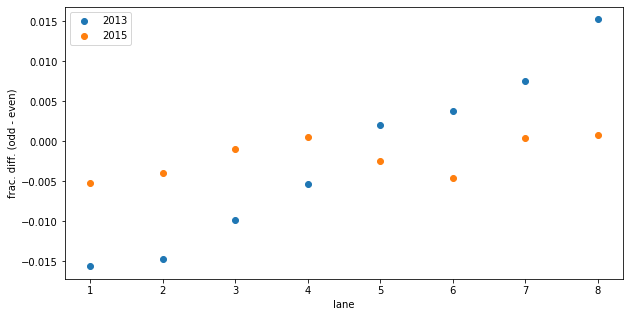

In [63]:
# Plot the fractional difference for 2013 and 2015
_ = plt.plot(lanes, f_13, marker='.', markersize=12, linestyle='none')
_ = plt.plot(lanes, f_15, marker='.', markersize=12, linestyle='none')

# Add a legend
_ = plt.legend((2013, 2015))

# Label axes
_ = plt.xlabel('lane')
_ = plt.ylabel('frac. diff. (odd - even)')

EDA has exposed a strong slope in 2013 compared to 2015!

### How does the current effect depend on lane position?
To quantify the effect of lane number on performance, perform a linear regression on the f_13 versus lanes data. Do a pairs bootstrap calculation to get a 95% confidence interval. Finally, make a plot of the regression.

Note that we could compute error bars on the mean fractional differences and use them in the regression, but that is beyond the scope of this course.


slope: 0.00447 per lane
95% conf int: [0.00393, 0.00501] per lane


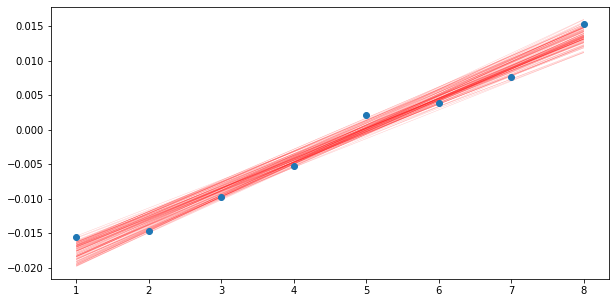

In [66]:
# Compute the slope and intercept of the fra diff/lane curve
slope, intercept = np.polyfit(lanes, f_13, 1)

# Compute bootstrap replicates
bs_reps_slope, bs_reps_int = dcst.draw_bs_pairs_linreg(lanes, f_13, 10000)

# Compute 95% confidence interval of slope
conf_int = np.percentile(bs_reps_slope, [2.5, 97.5])

# Print slope and confidence interval
print("""
slope: {0:.5f} per lane
95% conf int: [{1:.5f}, {2:.5f}] per lane""".format(slope, *conf_int))

# x-values for plotting regression lines
x = np.array([1, 8])

# Plot 100 bootstrap replicate lines
for i in range(100):
    _ = plt.plot(x, bs_reps_slope[i] * x + bs_reps_int[i], 
                 color='red', alpha=0.2, linewidth=0.5)
    
# Update the plot
_ = plt.plot(lanes, f_13, marker='.', markersize=12, linestyle='none')
plt.draw()

The slope is a fractional difference of about 0.4% per lane. This is quite a substantial difference at this elite level of swimming where races can be decided by tiny differences.

### Hypothesis test: can this be by chance?
The EDA and linear regression analysis is pretty conclusive. Nonetheless, you will top off the analysis of the zigzag effect by testing the hypothesis that lane assignment has nothing to do with the mean fractional difference between even and odd lanes using a permutation test. You will use the Pearson correlation coefficient, which you can compute with `dcst.pearson_r()` as the test statistic. 

In [67]:
# Compute observed correlation: rho
rho = dcst.pearson_r(lanes, f_13)

# Initialize permutation reps: perm_reps_rho
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the lanes array: scrambled_lanes
    scrambled_lanes = np.random.permutation(lanes)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_lanes, f_13)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)

p = 0.0


The p-value is very small, as you would expect from the confidence interval of the last exercise.